In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=6
paper='2004.04168'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

I'm given a Hamiltonian for a condensed matter system, and I need to convert it into a Python class implementation. Let me work through this step by step.

First, I need to understand the Hamiltonian:

1. Kinetic term: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$
   where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$

2. Hartree term: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$

3. Fock term: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

4. Interaction potential: $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$, with on-site interaction U_0 and nearest-neighbor interaction U_1.

5. Hopping parameters: t_1 = 6 meV for nearest-neighbor and t_2 = 1 meV for next-nearest-neighbor.

The lattice is triangular.

Let me start answering th

In [7]:
print(generated_code['thinking'])

I'm given a Hamiltonian for a condensed matter system, and I need to convert it into a Python class implementation. Let me work through this step by step.

First, I need to understand the Hamiltonian:

1. Kinetic term: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$
   where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$

2. Hartree term: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$

3. Fock term: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

4. Interaction potential: $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$, with on-site interaction U_0 and nearest-neighbor interaction U_1.

5. Hopping parameters: t_1 = 6 meV for nearest-neighbor and t_2 = 1 meV for next-nearest-neighbor.

The lattice is triangular.

Let me start answering the questions:

## QUESTION 1: Dimension and Basis Orde

In [8]:
print(generated_code['text'])

# Analysis of Hamiltonian Equation

I'll solve this step-by-step by first understanding the given Hamiltonian, then implementing the HartreeFockHamiltonian class.

## QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian:
- $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$
- $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
- $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

The index $s$ represents the spin or flavor index. In this Hamiltonian, it appears that $s$ can take different values (spin up/down), which is common in condensed matter physics.

Tuple of Flavors (D) = (2,)
Basis Order:
0: spin. Order: spin_up
1: spin. Order: spin_down

## QUESTION 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS:
- $\langle c_s^\dagger(k_1) c_s(k_1) \rangle$: "Average occup

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """HartreeFock Hamiltonian for a two-band system on a triangular lattice with
    nearest-neighbor and next-nearest-neighbor hopping, and on-site and 
    nearest-neighbor interactions.
    
    Args:
      N_shell (int): Number of shells in the first Brillouin zone.
      parameters (dict): Dictionary containing model parameters such as 't_1', 't_2', 'U_0', 'U_1'.
      filling_factor (float): Filling factor, default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t_1': 6.0, 't_2': 1.0, 'U_0': 1.0, 'U_1': 0.5}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2,) # 2 spin flavors
        self.basis_order = {'0': 'spin'}
        # Order for each flavor:
        # 0: spin up
        # 1: spin down

        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, d

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_6.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

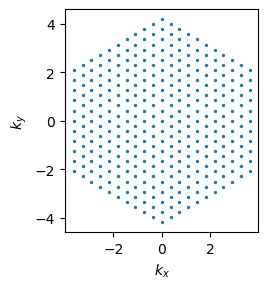

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

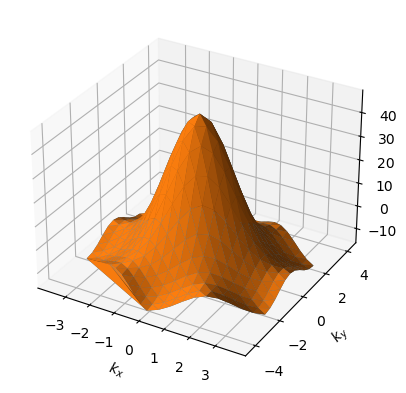

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

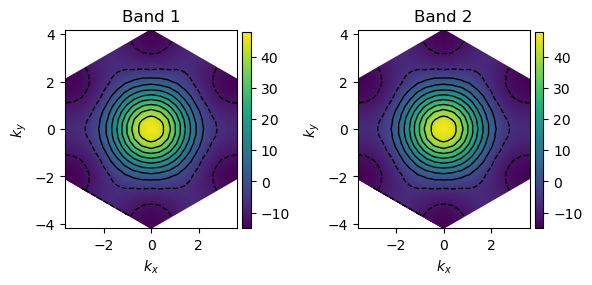

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e-5},filling_factor=0.5)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [25]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


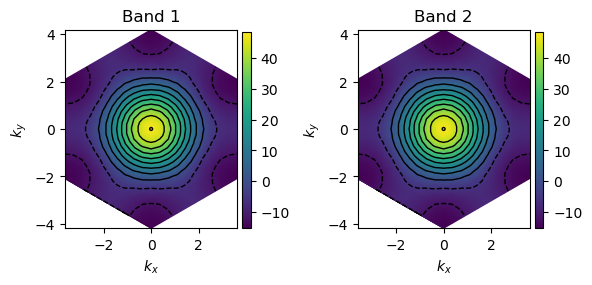

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e5},filling_factor=0.5)

In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 1


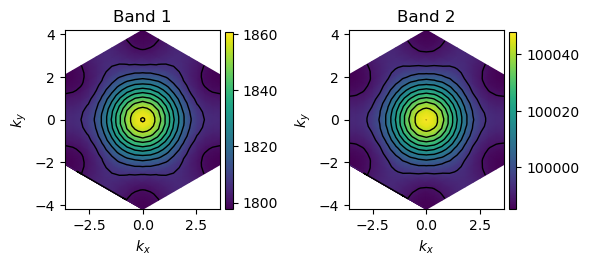

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is 98124.18
U/T is 4299.62
mean_U is 25302.11


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let's evaluate the image based on the provided Hamiltonian and the rubric.

The rubric asks for two things:
1. The image should show a momentum space mesh in the first Brillouin zone of the concerned problem.
2. We need to check the point group symmetry.

First, let's identify what the image shows:
- The image displays a hexagonal arrangement of points in the (k_x, k_y) plane, which represents a momentum space mesh.
- The points are distributed in a hexagonal pattern within a boundary that appears to be the first Brillouin zone.
- The k_x axis spans approximately from -3 to 3, and the k_y axis spans approximately from -4 to 4.

Now, let's relate this to the problem:

The problem states that the lattice is triangular. The first Brillouin zone of a triangular lattice is known to be hexagonal in shape. This is consistent with what we see in the image - a hexagonal arrangement of k-points.

Regarding the point group symmetry:
- A triangu

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

I'll go through the rubric step-by-step to analyze the band structure plots shown in the image.

First, let me examine what's shown in the image:
- The image contains two false color plots labeled "Band 1" and "Band 2"
- Both plots show the energy distribution in k-space (momentum space) with kx and ky axes
- The color scale on the right indicates energy levels, with yellow representing higher energies (around 40 meV) and purple representing lower energies (around -10 meV)
- Both plots have contour lines showing equal energy surfaces
- The Brillouin zone appears to be hexagonal in shape

Now, let's go through the rubric points:

1. Identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

The Brillouin zone boundary in both plots is hexagonal in shape. This is indeed what we expect for a triangular lattice in real space, as the first Brillouin zone of a triangular lattice is a

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0, nu=1/2)
    )


#################### THINKING ####################

Let's analyze the image according to the rubric:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

In the image, I can see that the Brillouin zone has a hexagonal shape, which is indeed the expected shape for a triangular lattice. The hexagonal boundary is clear in both Band 1 and Band 2 plots. This matches what we would expect for a triangular lattice.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
The highest energy regions (yellow) appear to be at the center of both Band 1 and Band 2 plots, around the point (0,0) in k-space. 

2.2 Trace the pattern of energy variation across the zone
The energy decreases radially outward from the center, moving from yellow to green to blue to purple as we move from the center to the edges of the Brillouin zone. The contour lines fo

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int=1e5)
    )


#################### THINKING ####################

Let me analyze the image and check it against the rubric to determine if it correctly shows the false color plot for interacting-renormalized band structure after a self-consistent Hartree-Fock calculation for a triangular lattice system.

First, I'll go through each point in the rubric systematically:

### 1. Brillouin Zone Shape
The image shows two band plots (Band 1 and Band 2) with hexagonal boundaries, which is the expected shape for the first Brillouin zone of a triangular lattice. The hexagonal shape is clearly visible in both plots, with the k-space coordinates (kx and ky) spanning from approximately -4 to 4. This matches what we would expect for a triangular lattice.

### 2. Symmetry of Energy Distribution

#### 2.1 Highest Energy Regions (Yellow)
- In both Band 1 and Band 2, the highest energy regions (yellow) are centered around (0,0), the Γ point.

#### 2.2 Pattern of Energy Variation
- The energy decreases radially outwa

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '6' saved to final_answer.yaml
